## Importing liberaries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## 1. Load the Dataset 

In [2]:
dt = pd.read_csv('IRIS.csv')

In [3]:
# Display basic information
print("Initial Data Info:\n")
dt.info()

Initial Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Display first few rows
dt.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dt.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
print("\nClass Distribution:\n")
print(dt['species'].value_counts())


Class Distribution:

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


## 2. Exploratory Data Analysis (EDA)

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


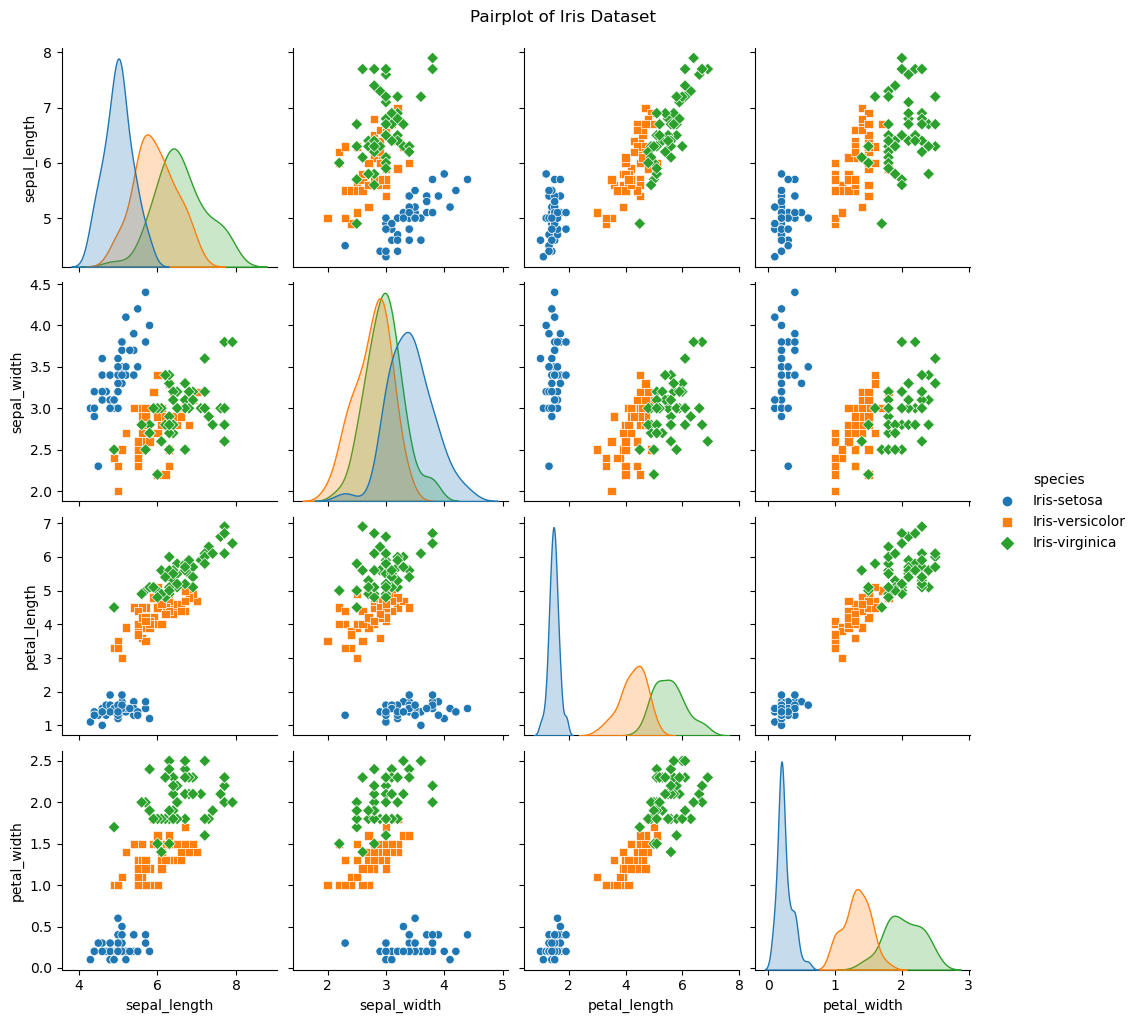

In [7]:
# Pairplot to visualize the distribution and relationships
sns.pairplot(dt, hue='species', markers=["o", "s", "D"])
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()

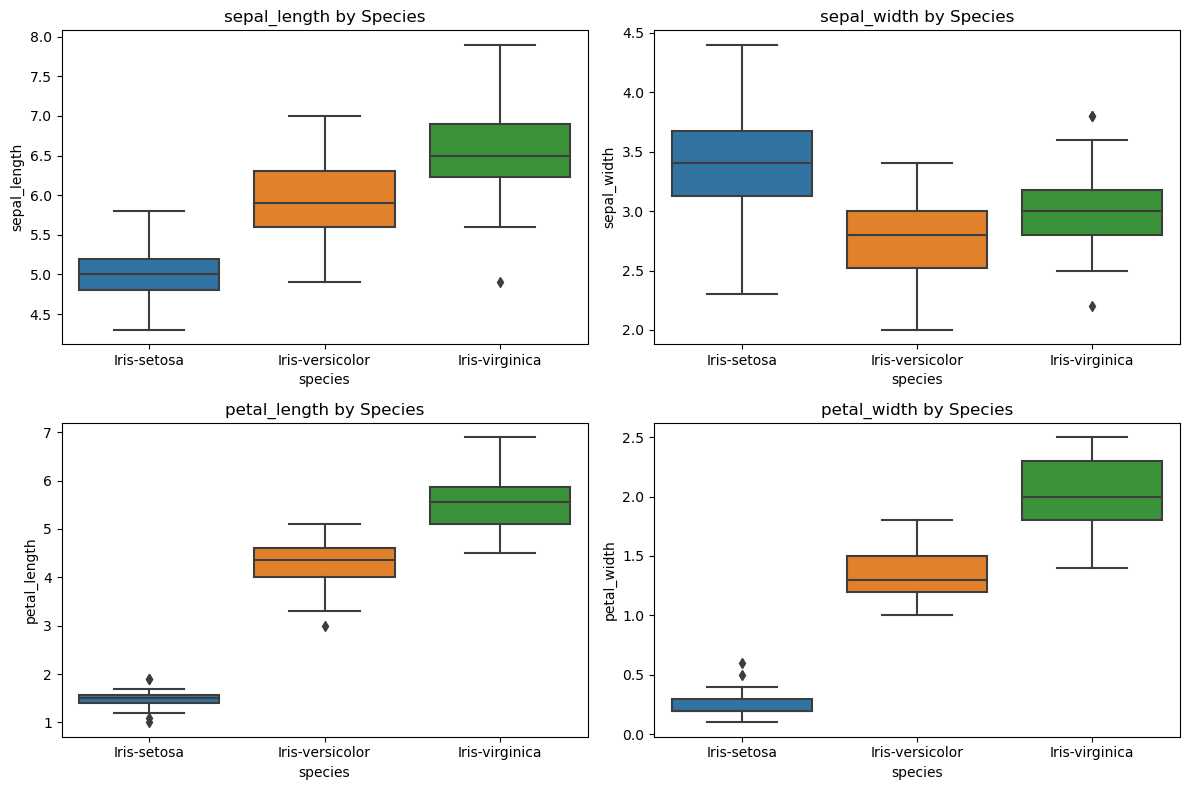

In [8]:
# Box plot to show feature distribution by species
plt.figure(figsize=(12, 8))
for i, column in enumerate(dt.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=column, data=dt)
    plt.title(f'{column} by Species')
plt.tight_layout()
plt.show()

In [9]:
# Check data types and convert if necessary
dt.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## 3. Data Preprocessing

In [10]:
print("\nMissing Values:\n")
print(dt.isnull().sum())


Missing Values:

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [11]:
# Handle Missing Values (if any)
if dt.isnull().sum().sum() > 0:
    dt.fillna(dt.mean(), inplace=True)

In [12]:
# Encode the target variable
label_encoder = LabelEncoder()
dt['species'] = label_encoder.fit_transform(dt['species'])

In [13]:
# Split data into features and target
X = dt.drop('species', axis=1)
y = dt['species']

In [14]:
# Scale the features
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Train-Test Split (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [16]:
rf = RandomForestClassifier(random_state=42)
cross_val_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

In [17]:
print("\nCross-Validation Scores:", cross_val_scores)
print("Mean Accuracy (CV):", round(cross_val_scores.mean(), 2))


Cross-Validation Scores: [0.95238095 0.9047619  0.9047619  1.         0.95238095]
Mean Accuracy (CV): 0.94


In [18]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [19]:
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [20]:
# Print best hyperparameters from GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [21]:
# Use the best model from GridSearchCV
best_rf = grid_search.best_estimator_

In [22]:
# Test accuracy
test_accuracy = best_rf.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 1.0


In [23]:
# Classification report
y_pred = best_rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [24]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


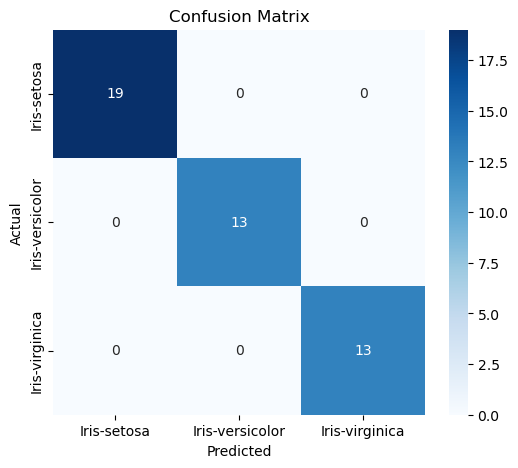

In [25]:
# Visualization of Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
import pickle
pickle.dump(best_rf, open('best_rf_model.pkl', 'wb'))